<h1 style='text-align: center;'> Aula Invertida 2: Distribuciones de probabilidad </h1>
En base a la distribución de probabilidades realizadas,  generar una investigación de las siguientes distribuciones basandose en los ejemplos de clase (introducción, descripción, ejemplos del uso).

- Hipergeométrica
- Uniforme
- Binomial Negativa


In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 

## Distribución Hipergeométrica
La distribución hipergeométrica es especialmente útil en todos aquellos casos en los que se extraigan muestras o se realizan experiencias repetidas sin devolución del elemento extraído o sin retornar a la situación experimental inicial.

La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) esta dada por la formula:

$$p(r; n, N, M) = \frac{\left(\begin{array}{c} M \\ r \end{array}\right)\left(\begin{array}{c} N - M\\ n -r \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}
$$

En dónde el valor de $r$ esta limitado por $\max(0, n - N + M)$ y $\min(n, M)$ inclusive; y los parámetros $n$ ($1 \le n \le N$), $N$ ($N \ge 1$) y $M$ ($M \ge 1$) son todos números enteros. La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar *sin reemplazo* (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos $N$ elementos de los cuales $M$ tienen un cierto atributo (y $N - M$ no tiene). Si escogemos $n$ elementos al azar *sin reemplazo*, $p(r)$ es la *probabilidad* de que exactamente $r$ de los elementos seleccionados provienen del grupo con el atributo. 

**Ejemplo**:
Supongamos que tenemos una colección de 20 animales, de los cuales 7 son perros. Entonces, si queremos saber la probabilidad de encontrar un número dado de perros si elegimos al azar 12 de los 20 animales, podemos inicializar una distribución congelada y trazar la función de masa de probabilidad:

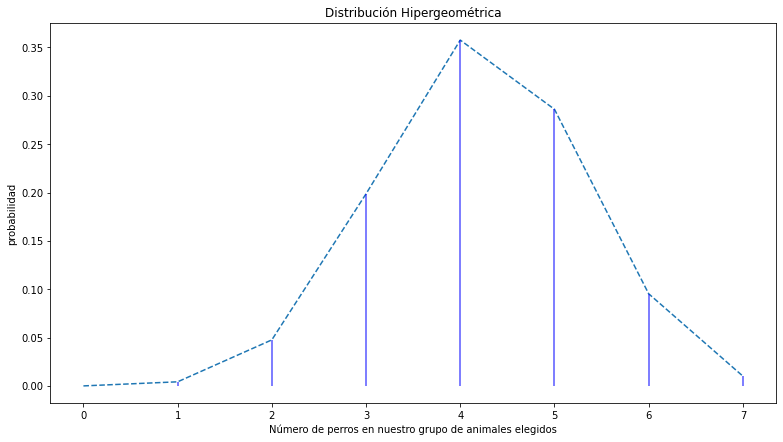

In [2]:
# Gráfica distribución Hipergeométrica
M, n, N = 20,7,12
hipergeometrica = stats.hypergeom(M, n, N)
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) 

plt.figure(figsize=(13,7))
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=2, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('Número de perros en nuestro grupo de animales elegidos')
plt.show()

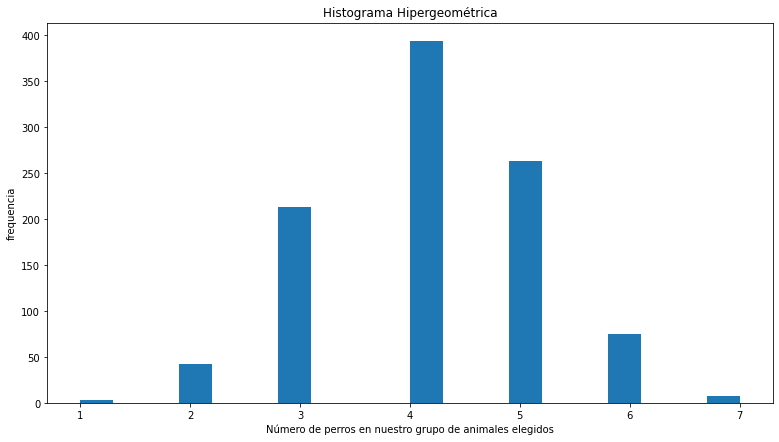

In [3]:
# Histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios

plt.figure(figsize=(13,7))
plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('Número de perros en nuestro grupo de animales elegidos')
plt.title('Histograma Hipergeométrica')
plt.show()

## Distribución Uniforme
La [distribución uniforme discreta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta) es una distribución de probabilidad discreta simétrica que surge en espacios de probabilidad equiprobables, es decir, en situaciones donde de {\displaystyle n}n resultados diferentes, todos tienen la misma probabilidad de ocurrir.

Se encuentra expresada por la función:
$$f(x; a, b) = \frac{1}{b -a} \ \mbox{para} \ a \le x \le b$$

Su función de distribución esta dada por:

$$p(x;a, b) = \left\{
    \begin{array}{ll}
            0  & \mbox{si } x \le a \\
            \frac{x-a}{b-a} & \mbox{si } a \le x \le b \\
            1 & \mbox{si } b \le x
    \end{array}
\right.$$

**Un ejemplo** simple de la distribución uniforme discreta es tirar los dados. Los valores posibles son 1, 2, 3, 4, 5, 6 y cada vez que se lanza el dado, la probabilidad de una puntuación determinada es de 1/6. Si se lanzan dos dados y se suman sus valores, la distribución resultante ya no es uniforme porque no todas las sumas tienen la misma probabilidad. Aunque es conveniente describir distribuciones uniformes discretas sobre enteros, como este, también se pueden considerar distribuciones uniformes discretas sobre cualquier conjunto finito . Por ejemplo, una permutación aleatoria es una permutación generada uniformemente a partir de las permutaciones de una longitud determinada, y un árbol de expansión uniforme es un árbol de expansión. generado uniformemente a partir de los árboles de expansión de un gráfico dado.

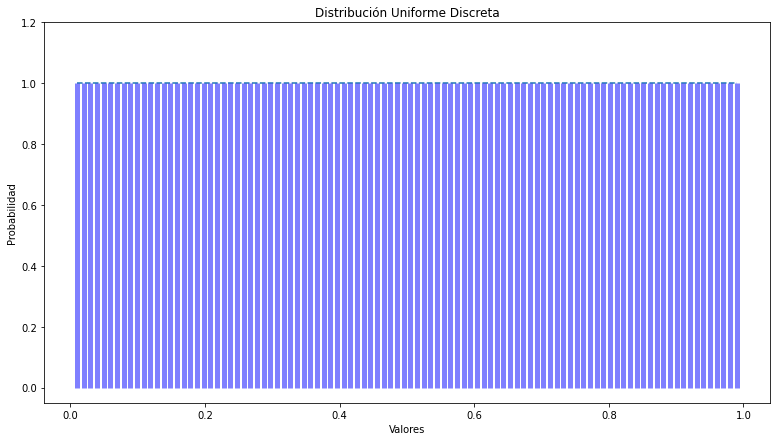

In [4]:
# Gráfica distribución Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)

fp = uniforme.pdf(x) 
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(13)
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme Discreta')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

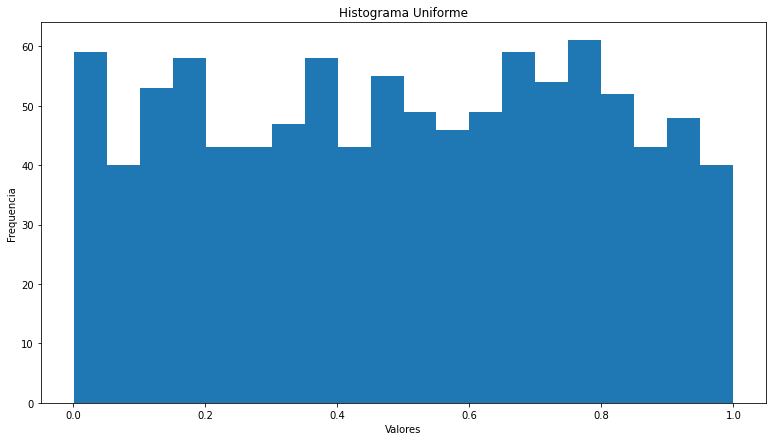

In [5]:
# Histograma
aleatorios = uniforme.rvs(1000) 
plt.figure(figsize=(13,7))
plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Uniforme')
plt.show()

## Distribución Binomial Negativa
La [distribución binomial negativa](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial_negativa) es utilizada en procesos en los cuales se ve necesaria la repetición de ensayos hasta conseguir un número de casos favorables (primer éxito).
<br>
Condiciones:

*   El proceso tiene un número indefinido de pruebas,que pare cuando llegue a un determinado numero de resultados favorables r.
*   Las pruebas se agrupan en dos resultados posibles y excluyentes a su vez, es decir, A y no A.
*   La probabilidad de obtener un resultado A en las pruebas es p, y la de conseguir no A es q, de forma que p+q=1.
*   p y q se establecen como constantes en cada prueba y a su vez estas son independientes.
<br>

Funcion de distribucion:
$$F(x|r,p) = \left\{
	\begin{array}{ll}
           \
            \frac{τ(r+x)}{τ(r)τ(x+1)}p^r(1-p)^r\\
	\end{array}
\right.$$
<br>

**Un ejemplo** para la distribución binomial negativa puede modelar el número de veces que se lanza al aire una moneda para obtener cinco cruces. 

<br>
Funcion de probabilidad:

$$F(k) = \left\{
	\begin{array}{ll}
           \
            {k+n-1 \choose  n-1} p^n (1-p)^k
            \
	\end{array}
\right.$$
<br>
En donde: 
- $k \geq 0 $
- $0 < p \leq 1$

Como parámetros de forma donde n es el número de éxitos,  es la probabilidad de un solo éxito, y  es la probabilidad de un solo fallo.



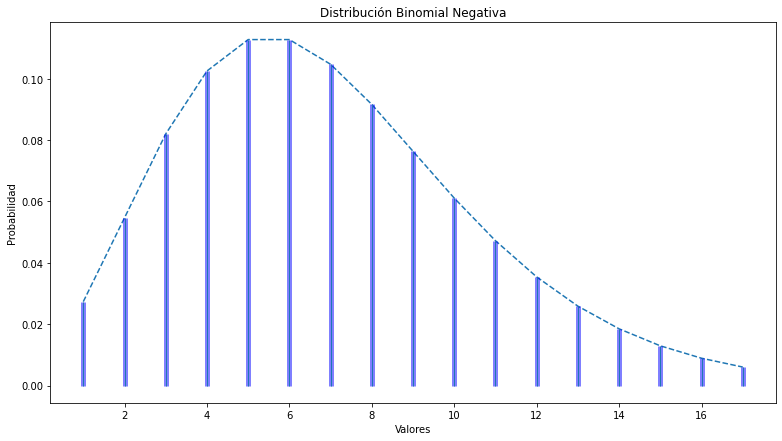

In [6]:
# Gráfica distribución Binomial Negativa
n, p = 7, 0.5
mean, var, skew, kurt = stats.nbinom.stats(n, p, moments='mvsk')

x = np.arange(stats.nbinom.ppf(0.01, n, p),
              stats.nbinom.ppf(0.99, n, p))
plt.figure(figsize=(13,7))
plt.plot(x, stats.nbinom.pmf(x, n, p), '--', ms=8)
plt.vlines(x, 0, stats.nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = stats.nbinom(n, p)
plt.vlines(x, 0, rv.pmf(x), linestyles='-', lw=1)
plt.title('Distribución Binomial Negativa')
plt.ylabel('Probabilidad')
plt.xlabel('Valores')
plt.show()

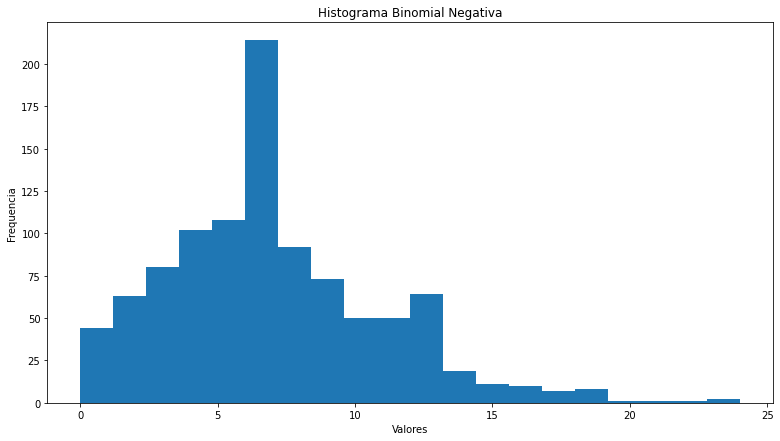

In [7]:
# Histograma
aleatorios = rv.rvs(1000) 
plt.figure(figsize=(13,7))
plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Binomial Negativa')
plt.show()

### Referencias
1. http://halweb.uc3m.es/esp/Personal/personas/icascos/esp/resumen_distribuciones.pdf
2. https://www.sergas.es/Saude-publica/Documents/1899/Ayuda_Epidat_4_Distribuciones_de_probabilidad_Octubre2014.pdf
3. https://www.ugr.es/~proman/ProbI/2016_2017/PDF/DistribucionesContinuas.pdf
4. https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/